In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial import distance
from scipy.cluster.hierarchy import fcluster
from sklearn import metrics
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'H', 'x', '+', '<', '>', '1', '2', '3', '4']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
df = pd.read_csv("../../datasets/paises.csv", sep=",")
pad = ["Marshall Islands", "Malawi",  "Vanuatu",  "Burkina Faso", 
       "Benin","United Arab Emirates", "Israel", "Angola", "Lithuania", "Giorgia", "Guinea-Bissau", 'Gambia, The',
       "Sri Lanka", "Guinea", "Malaysia", "Mongolia"]
#Borro paises con datos dudosos
df = df[~df['Country'].str.strip().isin(pad)]


In [2]:
list(df["Country"])[20:] 

['Ecuador ',
 'Spain ',
 'Estonia ',
 'Finland ',
 'Fiji ',
 'France ',
 'United Kingdom ',
 'Georgia ',
 'Greece ',
 'Honduras ',
 'Croatia ',
 'Hungary ',
 'Indonesia ',
 'India ',
 'Ireland ',
 'Italy ',
 'Kazakhstan ',
 'Latvia ',
 'Moldova ',
 'Mexico ',
 'Mali ',
 'Niger ',
 'Nigeria ',
 'Netherlands ',
 'Norway ',
 'Pakistan ',
 'Panama ',
 'Peru ',
 'Philippines ',
 'Poland ',
 'Portugal ',
 'Paraguay ',
 'Romania ',
 'Senegal ',
 'Sierra Leone ',
 'El Salvador ',
 'Slovenia ',
 'Sweden ',
 'Chad ',
 'Togo ',
 'Thailand ',
 'Turkey ',
 'Tanzania ',
 'Uganda ',
 'Ukraine ',
 'Uruguay ',
 'United States ',
 'Vietnam ',
 'Zimbabwe ']

Text(0, 0.5, 'distance')

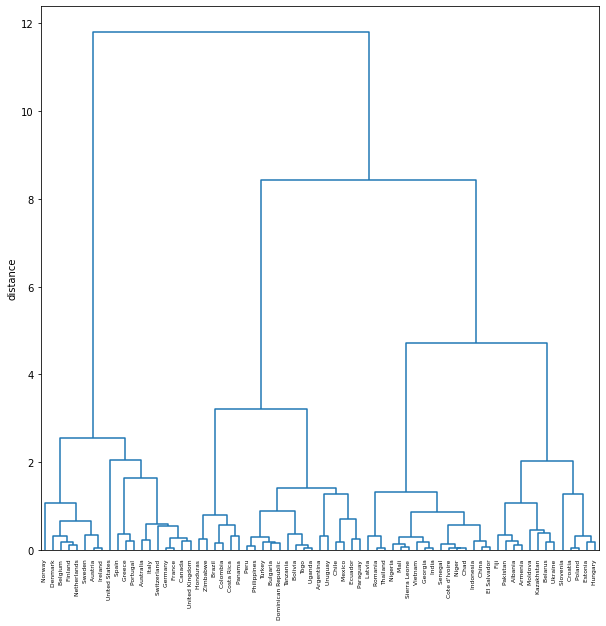

In [3]:
features = ['GiniFinal', 'GDP ($ per capita)']
sfeatures = ["s"+f for f in features]
scaler = StandardScaler()
df.loc[:,sfeatures] = scaler.fit_transform(df[features])
Z = linkage(df[sfeatures], method='ward')
#Resultados ver Uruguay/Argentina/Chile España/Grecia/Portugal
fig, ax = plt.subplots(figsize=(10,10))
dendrogram(Z, labels=list(df["Country"]), color_threshold=0)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

In [4]:
df.columns

Index(['Unnamed: 0', 'GiniFinal', 'Country', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service', 'sGiniFinal', 'sGDP ($ per capita)'],
      dtype='object')

Text(0, 0.5, 'distance')

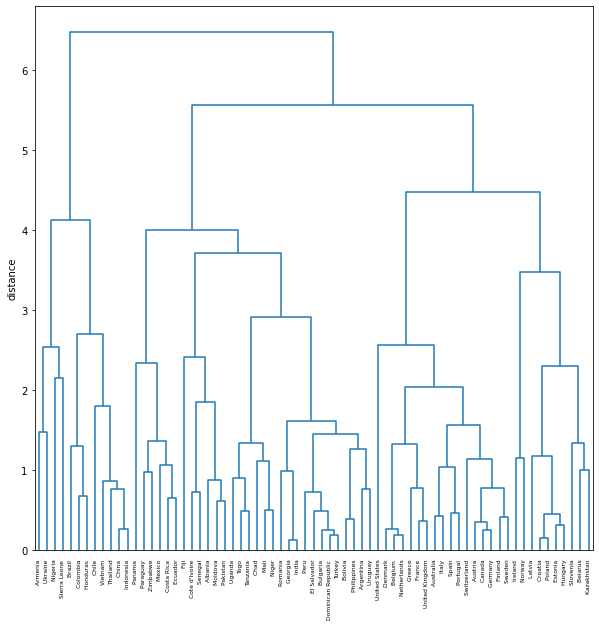

In [5]:
features = ['GiniFinal', 'GDP ($ per capita)', 'Service', 'Industry']
sfeatures = ["s"+f for f in features]
scaler = StandardScaler()
df.loc[:,sfeatures] = scaler.fit_transform(df[features])

Z = linkage(df[sfeatures], method='complete')

#Resultados ver Uruguay/Argentina/Chile España/Grecia/Portugal
fig, ax = plt.subplots(figsize=(10,10))
dendrogram(Z, labels=list(df["Country"]), color_threshold=0)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

In [6]:
cgrupos = 2
memb = fcluster(Z, cgrupos, criterion='maxclust')
memb = pd.Series(memb, index=df["Country"])

for key, item in memb.groupby(memb):
    #print(item)
    print(f"{key} : {', '.join(item.index)}")


1 : Armenia , Brazil , Chile , China , Colombia , Honduras , Indonesia , Nigeria , Sierra Leone , Thailand , Ukraine , Vietnam 
2 : Albania , Argentina , Australia , Austria , Belgium , Bulgaria , Belarus , Bolivia , Canada , Switzerland , Cote d'Ivoire , Costa Rica , Germany , Denmark , Dominican Republic , Ecuador , Spain , Estonia , Finland , Fiji , France , United Kingdom , Georgia , Greece , Croatia , Hungary , India , Ireland , Italy , Kazakhstan , Latvia , Moldova , Mexico , Mali , Niger , Netherlands , Norway , Pakistan , Panama , Peru , Philippines , Poland , Portugal , Paraguay , Romania , Senegal , El Salvador , Slovenia , Sweden , Chad , Togo , Turkey , Tanzania , Uganda , Uruguay , United States , Zimbabwe 


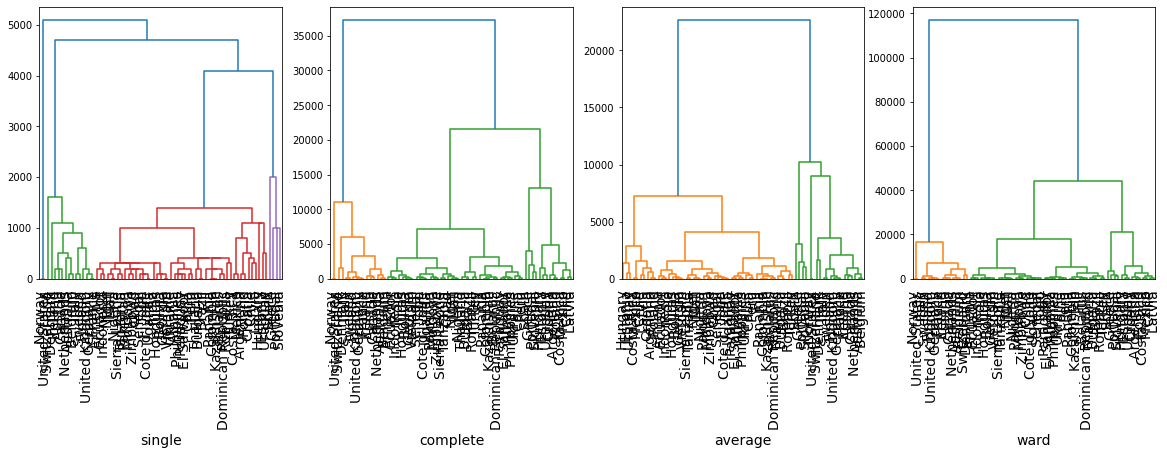

In [7]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
ms = ['single', 'complete', 'average', 'ward']
dms = []
Zs = []
for m, ax in zip(ms, axs) :
    dm = pdist(df[features], metric='euclidean') #single, complete, average, and ward
    dms.append(dm)
    Z = linkage(dm, method=m)#single, complete, average, and ward
    d = dendrogram(Z, labels=list(df["Country"]),show_leaf_counts=True, leaf_font_size=14, ax=ax)
    ax.set_xlabel(m, fontsize=14)
    Zs.append(Z)
plt.show()


In [8]:


for m, Z, dm in zip(ms, Zs, dms):
    memb = fcluster(Z, cgrupos, criterion='maxclust')
    memb = pd.Series(memb, index=df.index)
    df.loc[:,"cluster_"+m] = memb
    ss = metrics.silhouette_score(df[features], labels=memb, metric='euclidean')
    cpc, cp = cophenet(Z, dm)
    print("Criterio "+m+", SS: {:.3f}".format(ss) + ", Cophenet: {:.3f}".format(cpc))



Criterio single, SS: 0.457, Cophenet: 0.894
Criterio complete, SS: 0.746, Cophenet: 0.887
Criterio average, SS: 0.779, Cophenet: 0.908
Criterio ward, SS: 0.746, Cophenet: 0.898


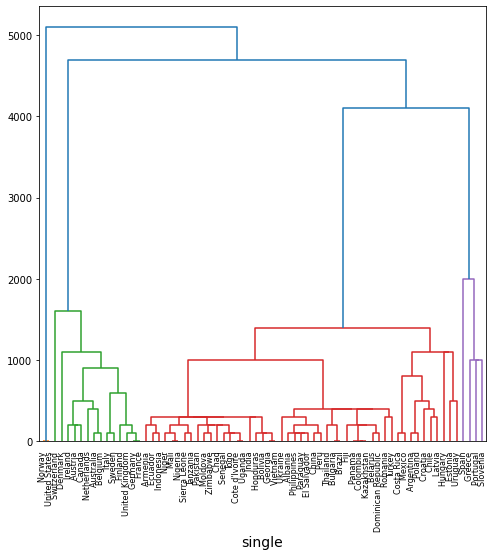

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
dm = pdist(df[features], metric='euclidean') #single, complete, average, and ward
Z = linkage(dm, method="single")#single, complete, average, and ward
d = dendrogram(Z, labels=list(df["Country"]), show_leaf_counts=True, leaf_font_size=14, ax=ax)
ax.set_xlabel("single", fontsize=14)
ax.tick_params(axis='x', which='major', labelsize=8)
plt.show()    


In [10]:
f = features.copy()
f.insert(0, "Country")

In [11]:
df[(df["Country"]=="Norway ") | (df["Country"]=="United States ")][f]

,Country,GiniFinal,GDP ($ per capita),Service,Industry
44,Norway,0.723500,37800.0,0.564,0.415
66,United States,0.591333,37800.0,0.787,0.204


In [12]:
cgrupos = 4
memb = fcluster(Zs[ms.index('single')], cgrupos, criterion='maxclust')
memb = pd.Series(memb, index=df["Country"])

for key, item in memb.groupby(memb):
    #print(item)
    print(f"{key} : {', '.join(item.index)}")

1 : Norway , United States 
2 : Australia , Austria , Belgium , Canada , Switzerland , Germany , Denmark , Finland , France , United Kingdom , Ireland , Italy , Netherlands , Sweden 
3 : Albania , Argentina , Armenia , Bulgaria , Belarus , Bolivia , Brazil , Chile , China , Cote d'Ivoire , Colombia , Costa Rica , Dominican Republic , Ecuador , Estonia , Fiji , Georgia , Honduras , Croatia , Hungary , Indonesia , India , Kazakhstan , Latvia , Moldova , Mexico , Mali , Niger , Nigeria , Pakistan , Panama , Peru , Philippines , Poland , Paraguay , Romania , Senegal , Sierra Leone , El Salvador , Chad , Togo , Thailand , Turkey , Tanzania , Uganda , Ukraine , Uruguay , Vietnam , Zimbabwe 
4 : Spain , Greece , Portugal , Slovenia 
